# NCI EAR5 data - Voila
This notebook runs ECMWF's aifs-single-0.2.1 data-driven model.

In [1]:
from nci import aifs_single
#import aifs_single

2025-02-18 20:52:52 INFO     __init__: import block NO
2025-02-18 20:52:57 INFO     /g/data/rt52/era5
2025-02-18 20:52:57 INFO     /g/data/dk92/data/aifs-single/aifs_single_v0.2.1.ckpt
2025-02-18 20:52:57 INFO     /g/data/rt52/era5
2025-02-18 20:52:57 INFO     /g/data/dk92/data/aifs-single/aifs_single_v0.2.1.ckpt
2025-02-18 20:52:57 INFO     batch data loacate
2025-02-18 20:52:57 INFO     prediction data loacate
2025-02-18 20:52:57 INFO     prediction dataset loacate


## 1. Select a datetime and lead

In [2]:
date_pick = aifs_single.get_date()
date_pick

DatePicker(value=datetime.date(2024, 1, 1), description='Init Date', step=1)

In [3]:
time_pick = aifs_single.get_init_time()
time_pick

Dropdown(description='Init Hour', options=(0, 6, 12, 18), value=0)

In [4]:
lead_time = aifs_single.get_lead_time()
lead_time

Dropdown(description='Lead Hours', index=2, options=(0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84,…

## 2. Get the data from the NCI (Xarray version)

In [5]:
aifs_single.get_batch(date_pick, time_pick)

2025-02-18 20:52:57 INFO     20231201-20231231
2025-02-18 20:52:57 INFO     2023-12-31T18:00:00
2025-02-18 20:52:57 INFO     /g/data/rt52/era5/single-levels/reanalysis/10u/2023/10u_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:52:59 INFO     /g/data/rt52/era5/single-levels/reanalysis/10v/2023/10v_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:00 INFO     /g/data/rt52/era5/single-levels/reanalysis/2d/2023/2d_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:01 INFO     /g/data/rt52/era5/single-levels/reanalysis/2t/2023/2t_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:01 INFO     /g/data/rt52/era5/single-levels/reanalysis/msl/2023/msl_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:03 INFO     /g/data/rt52/era5/single-levels/reanalysis/skt/2023/skt_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:04 INFO     /g/data/rt52/era5/single-levels/reanalysis/sp/2023/sp_era5_oper_sfc_20231201-20231231.nc
2025-02-18 20:53:05 INFO     /g/data/rt52/era5/single-levels/reanalysi

## 3. Load the Model and Run the Forecast

In [6]:
aifs_single.run_inference (lead_time)

2025-02-18 20:53:41 INFO     Loading batch data
2025-02-18 20:53:42 INFO     Accumulating fields ['cp', 'tp']
2025-02-18 20:53:42 INFO     Using SimpleRunner runner
2025-02-18 20:53:42 INFO     
2025-02-18 20:53:42 INFO     Start Inference
2025-02-18 20:53:42 INFO     Computed constant forcings: before ['cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude'], after ['cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude']
2025-02-18 20:53:42 INFO     Constant computed forcing: ComputedForcings(['cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude'])
2025-02-18 20:53:42 INFO     Dynamic computed forcing: ComputedForcings(['cos_julian_day', 'cos_local_time', 'sin_julian_day', 'sin_local_time', 'insolation'])
2025-02-18 20:53:42 INFO     Constant forcings input: ComputedForcings(['cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude']) ['cos_latitude', 'cos_longitude', 'sin_latitude', 'sin_longitude'] ([datetime.datetime(2023, 12, 31, 18, 0), dateti

## 4.a Inspect the generated forecast (Surface)

In [7]:
sfc_var = aifs_single.get_sfc_var() 
sfc_var

Dropdown(description='Surface Var', options=('sp', 'msl', '10u', '10v', '2t', '2d', 'skt', 'tcw', 'cp', 'tp'),…

In [23]:
ds = aifs_single.to_ds (sfc_var, None )

2025-02-18 20:57:10 INFO     tp
2025-02-18 20:57:10 INFO     tp
2025-02-18 20:57:10 INFO     Loading inference output data
2025-02-18 20:57:10 INFO     N320
2025-02-18 20:57:19 INFO     Lat/Lon
2025-02-18 20:57:19 INFO     Saving xarray data
2025-02-18 20:57:19 INFO     Done


In [9]:
#ds

In [24]:
idx = aifs_single.get_ds_index(ds)
idx

Dropdown(description='Index', options=(0, 1), value=0)

2025-02-18 20:57:45 INFO     tp


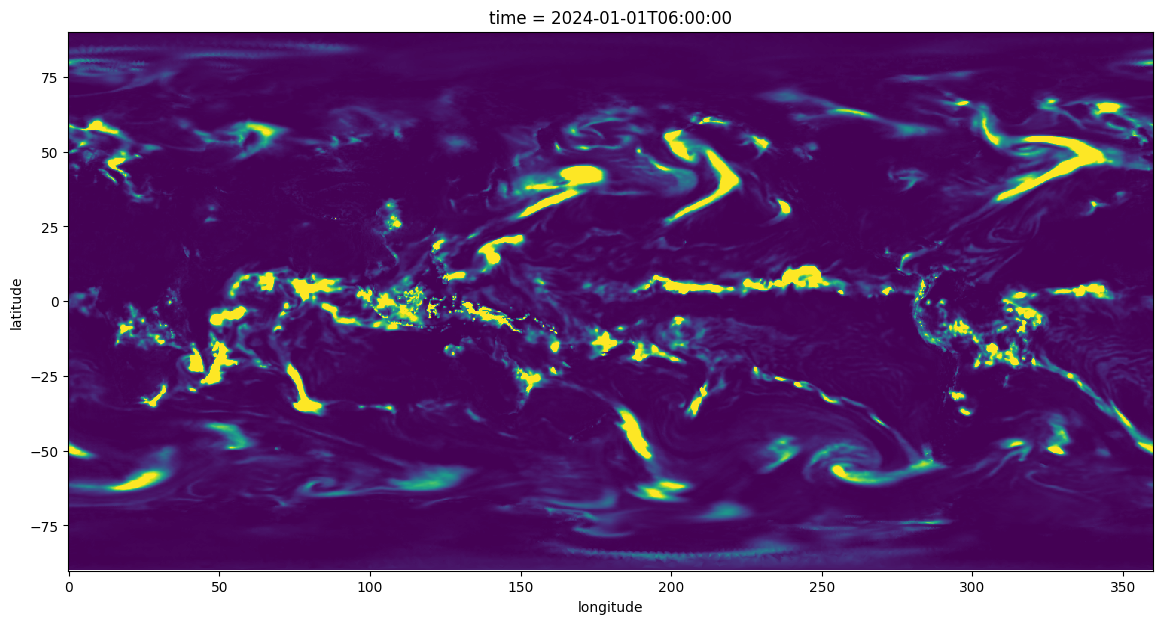

In [26]:
aifs_single.visualize (ds, sfc_var, None, idx )

## 4.b Inspect the generated forecast (Pressure level)

In [12]:
pl_var = aifs_single.get_pl_var ()
pl_var

Dropdown(description='Pressure Var', options=('z', 't', 'u', 'v', 'w', 'q'), value='z')

In [13]:
pl_level = aifs_single.get_pl_level ()
pl_level 

Dropdown(description='Pressure Level', options=(1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 5…

In [20]:
ds = aifs_single.to_ds (pl_var, pl_level  )

2025-02-18 20:55:21 INFO     v
2025-02-18 20:55:21 INFO     250
2025-02-18 20:55:21 INFO     v_250
2025-02-18 20:55:21 INFO     Loading inference output data
2025-02-18 20:55:21 INFO     N320
2025-02-18 20:55:29 INFO     Lat/Lon
2025-02-18 20:55:29 INFO     Saving xarray data
2025-02-18 20:55:29 INFO     Done


In [21]:
idx = aifs_single.get_ds_index(ds)
idx

Dropdown(description='Index', options=(0, 1), value=0)

In [16]:
#ds

2025-02-18 20:55:39 INFO     v_250


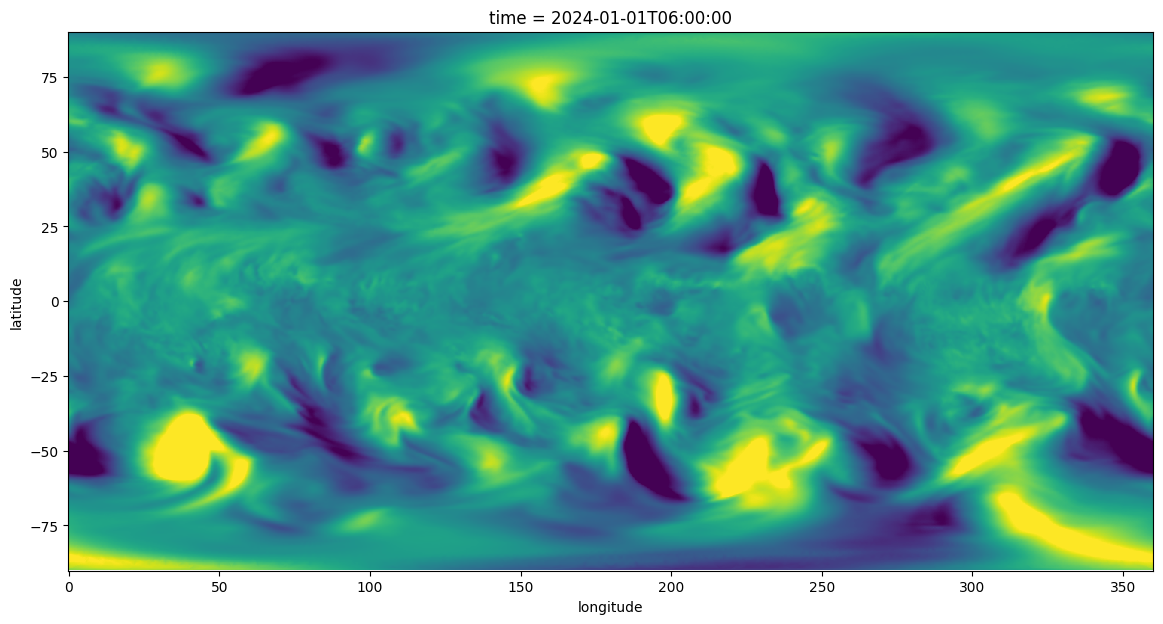

In [22]:
aifs_single.visualize (ds, pl_var, pl_level, idx )